<h1 align="center"> Plots </h1>

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

from tournament_simulations.data_structures import Matches
from turning_point.normal_coefficient import TurningPoint
from turning_point.variance_stats import ExpandingVarStats
from turning_point.permutation_coefficient import PermutationTurningPoint, TurningPointComparison
from turning_point.match_coefficient import MatchTurningPoint

from config import path

In [2]:
import logging
from logs import turning_logger

turning_logger.setLevel(logging.INFO)

In [3]:
SPORTS = ("basketball", "handball", "soccer", "volleyball")

path.PLOT_PATH.mkdir(parents=True, exist_ok=True)

<h2> Dataset </h2>

In [4]:
sport_to_matches = {
    sport: Matches(pd.read_csv(path.MATCHES_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

In [5]:
sport_to_var_stats = {
    sport: ExpandingVarStats(pd.read_csv(path.VARIANCE_STATS_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

sport_to_tp = {
    sport: TurningPoint(pd.read_csv(path.TURNING_POINT_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

sport_to_mtp = {
    sport: MatchTurningPoint.from_matches_and_turning_point(sport_to_matches[sport], sport_to_tp[sport])
    for sport in sport_to_tp
}

In [6]:
sport_to_permuted_var_stats = {
    sport: ExpandingVarStats(pd.read_csv(path.PERMUTED_VARIANCE_STATS_PATH / f"{sport}.csv"))
    for sport in SPORTS
}

sport_to_permuted_tp = {
    sport: PermutationTurningPoint(pd.read_csv(path.PERMUTED_TURNING_POINT_PATH / f"{sport}.csv"))
    for sport in SPORTS
}


In [7]:
import warnings

PERCENTILES = [2.5, 25, 50, 75, 97.5]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sport_to_tp_comparison = {
        sport: TurningPointComparison(sport_to_tp[sport], sport_to_permuted_tp[sport]).comparison(PERCENTILES)
        for sport in sport_to_tp
    }

<h2> Style </h2>

In [8]:
import data_analysis.plots.utils.customization

<h2> Temporal Progression </h2>

In [9]:
FIGSIZE = (18,13)
NUM_COLS = 2
NUM_ROWS = 2
TOURNEY_NAMES_AND_IDS = (
    ("NBA (Basketball)", "nba@/basketball/usa/nba-2019-2020/"),
    ("Superleague (Volleyball)", "superleague@/volleyball/russia/superleague-2019-2020/"),
    ("La Liga (Soccer)", "laliga@/soccer/spain/laliga-2019-2020/"),
    ("Herre Handbold Ligaen (Handball)", "herre-handbold-ligaen@/handball/denmark/herre-handbold-ligaen-2019-2020/"),
)

<h3> Variances </h3>

In [10]:
from data_analysis.plots.variances_temporal_progression import plot_variances_temporal_progression

LAST_DATE = 60

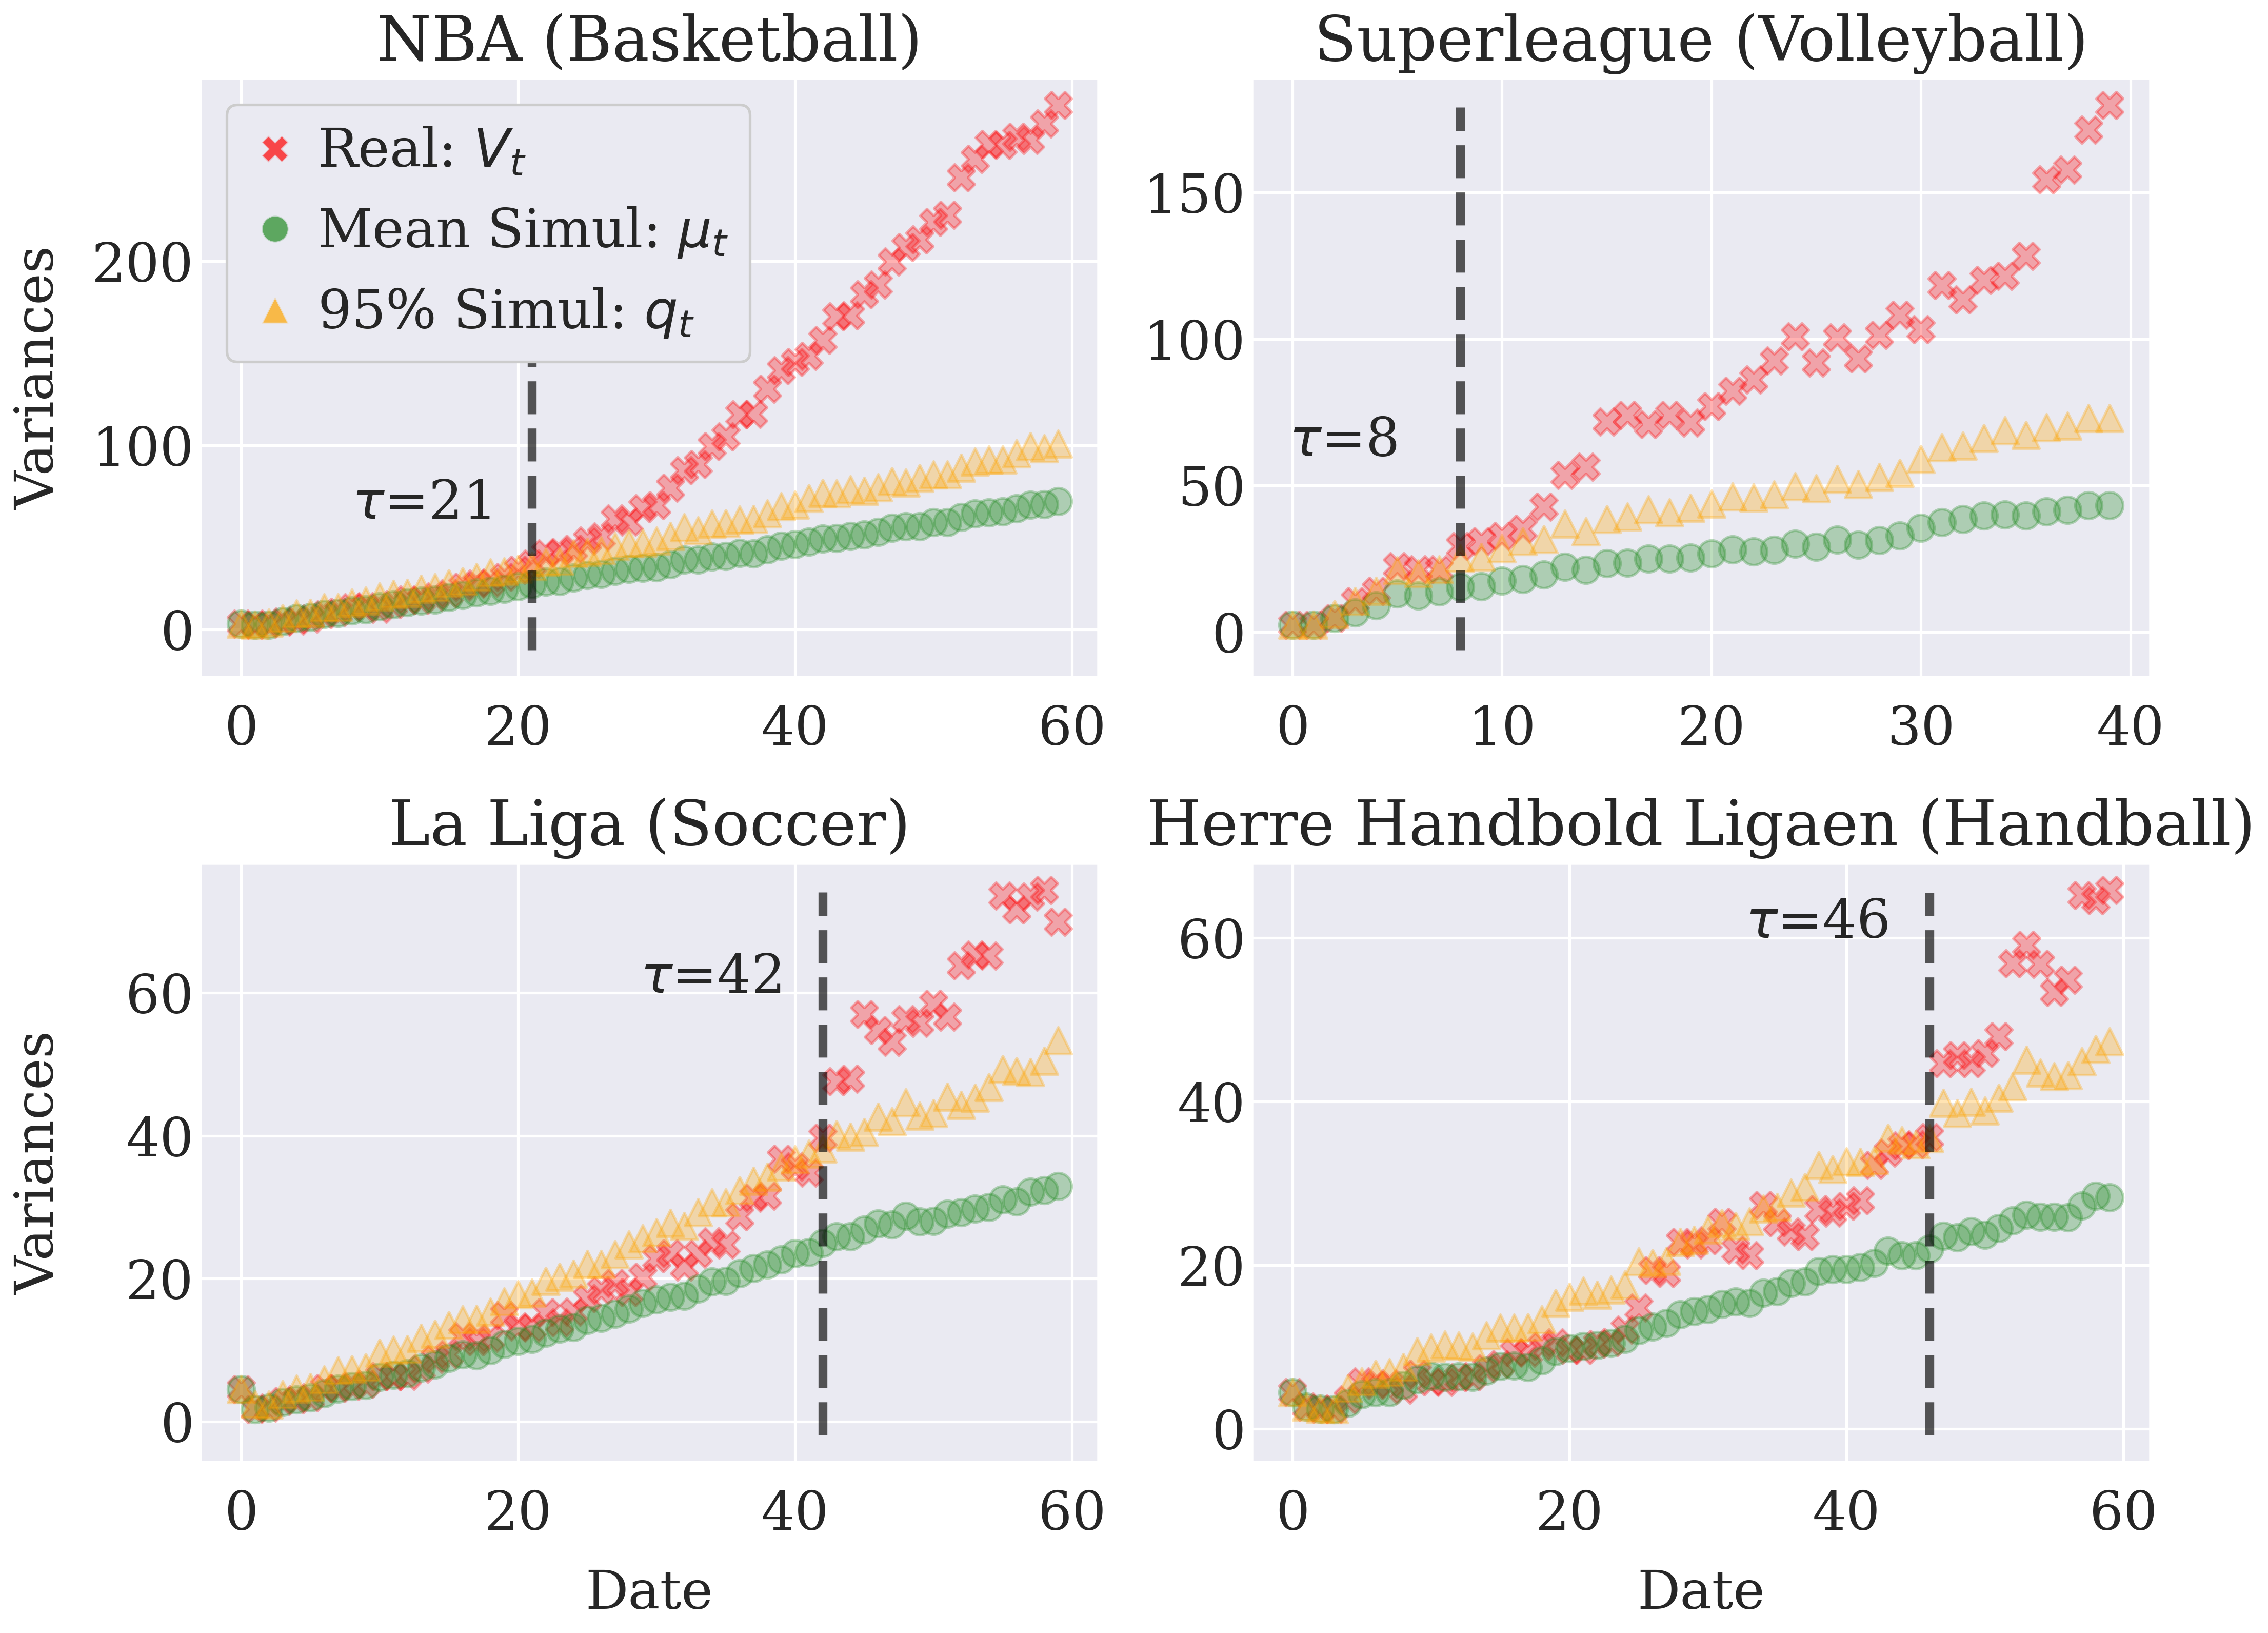

In [11]:
%matplotlib inline

plot_variances_temporal_progression(
    sport_to_tp, sport_to_var_stats, NUM_ROWS, NUM_COLS, FIGSIZE, TOURNEY_NAMES_AND_IDS, LAST_DATE
)

plt.savefig(path.PLOT_PATH / "turning_point_progression.pdf")

<h2> Statistical Data </h2>

<h3> Boxplot Turning Point </h3>

In [12]:
from data_analysis.plots.turning_point_boxplot import plot_boxplot_turning_points

MTP_TP_COLUMNS = ("match turning point", "%turning point")

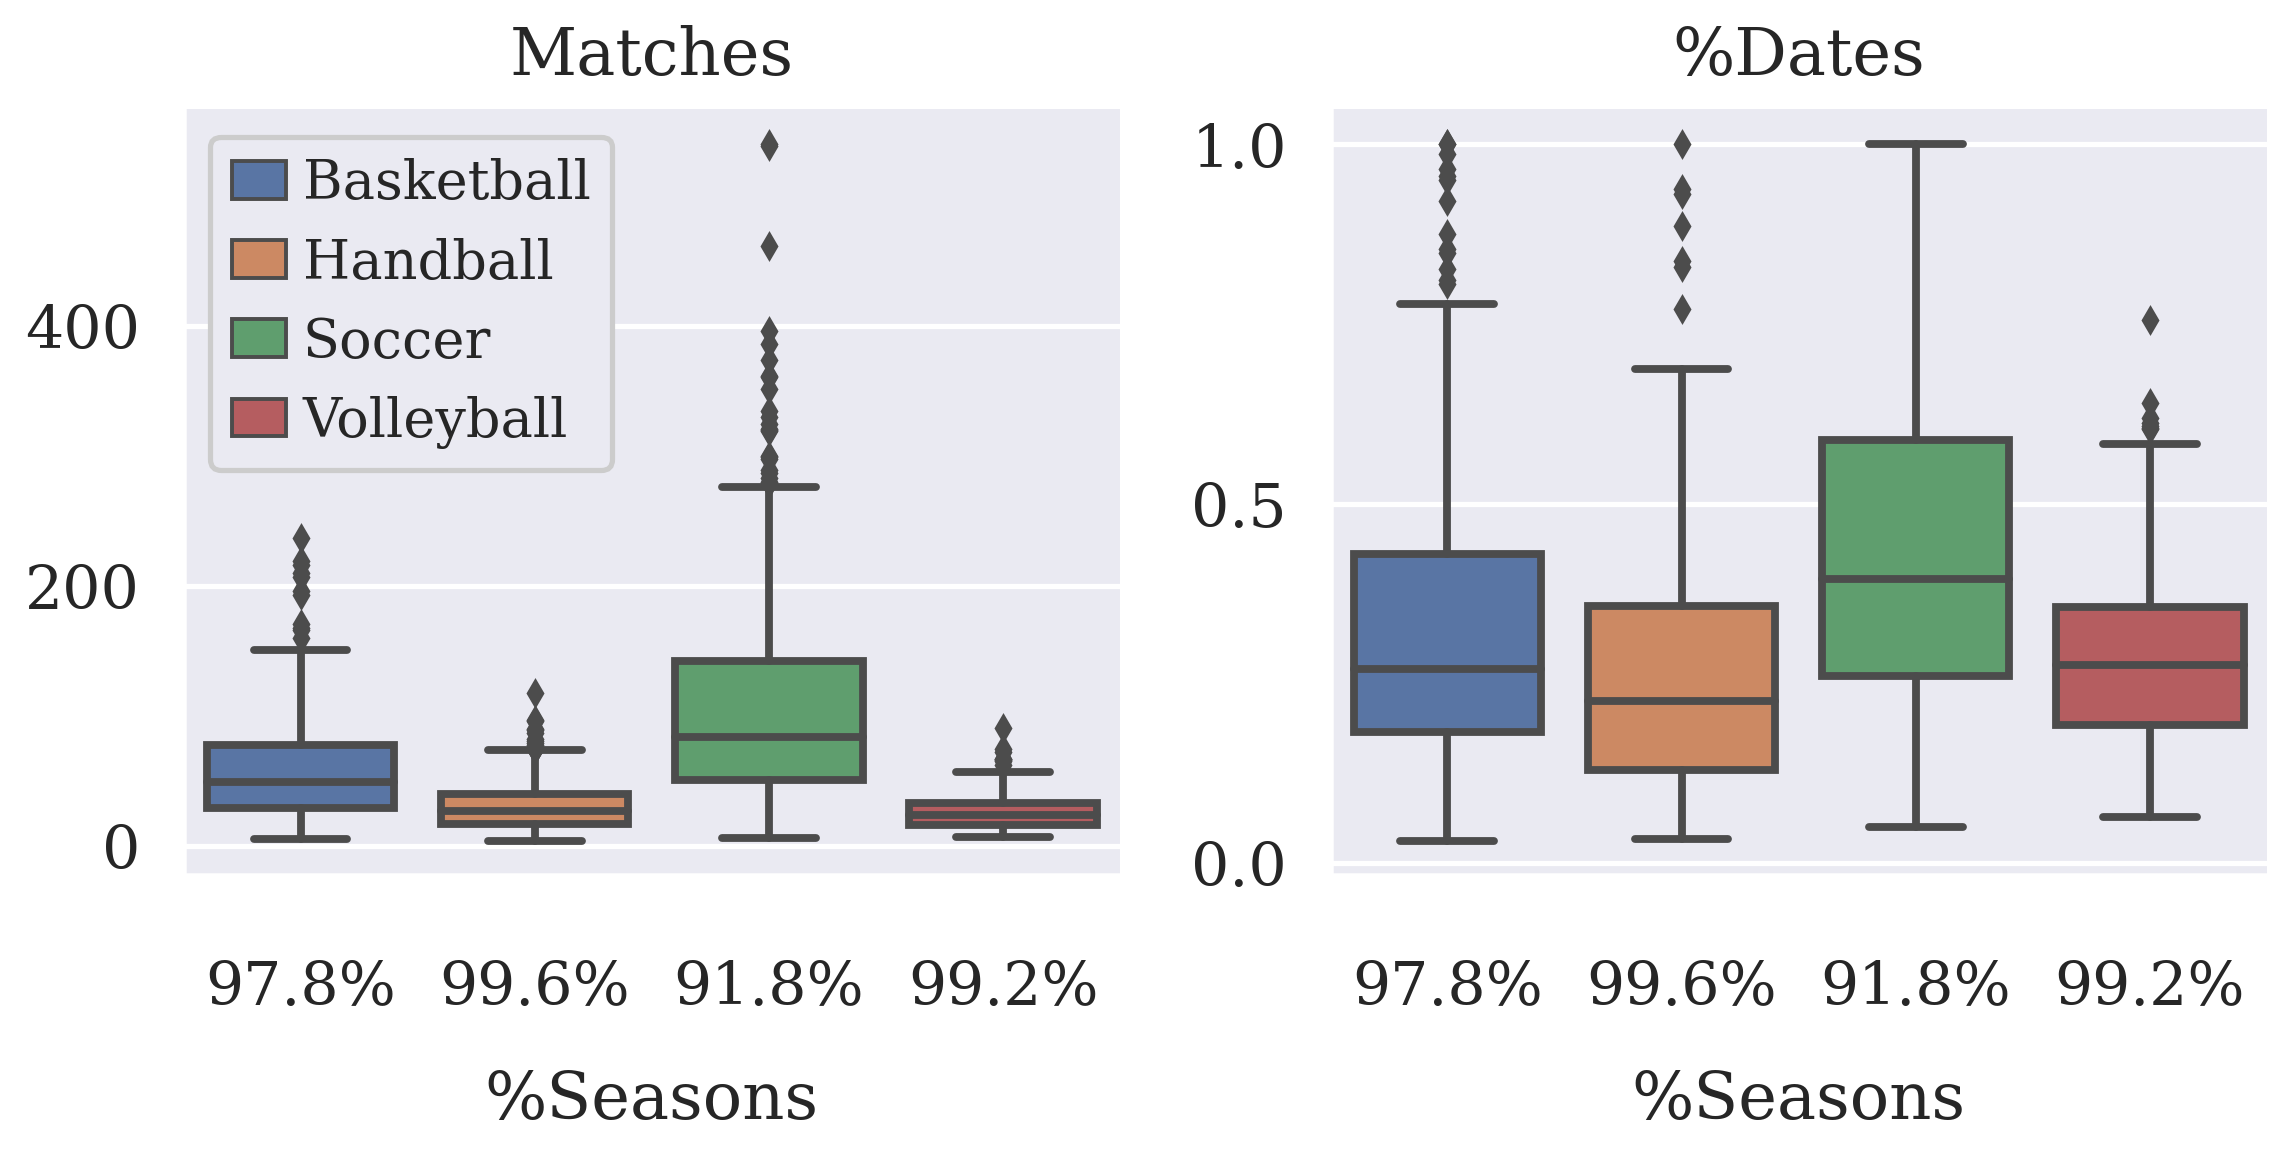

In [13]:
%matplotlib inline

plot_boxplot_turning_points(sport_to_tp, sport_to_mtp, MTP_TP_COLUMNS)

plt.savefig(path.PLOT_PATH / "turning_point_boxplot.pdf")

<h3> Boxplot Comparison </h3>

In [14]:
from data_analysis.plots.comparison_boxplot import plot_comparison_boxplot

COLUMN = "%turning point"

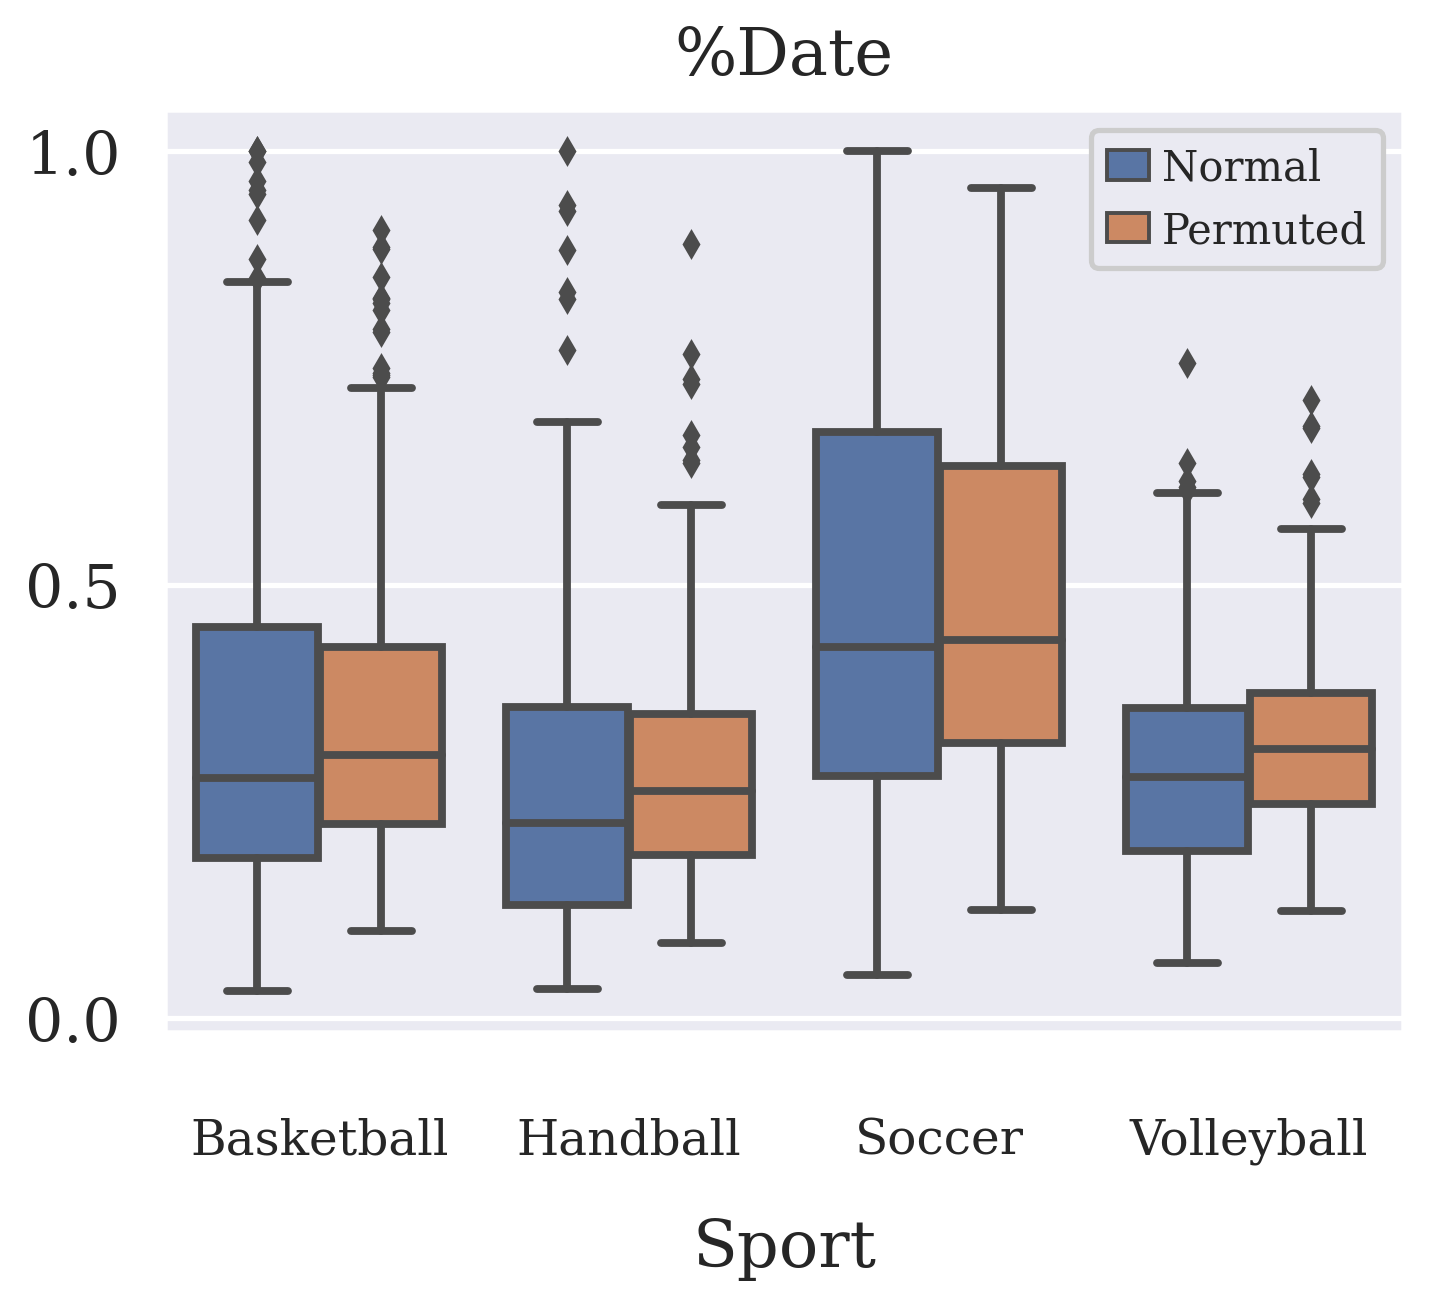

In [15]:
%matplotlib inline

plot_comparison_boxplot(sport_to_tp_comparison, COLUMN)

plt.savefig(path.PLOT_PATH / "turning_point_comparison_boxplot.pdf")

<h3> Scatter Comparison </h3>

In [16]:
from data_analysis.plots.comparison_scatter import plot_comparison_scatter

FIGSIZE = (18,13)
NUM_COLS = 2
NUM_ROWS = 2
COLUMN = "%turning point"

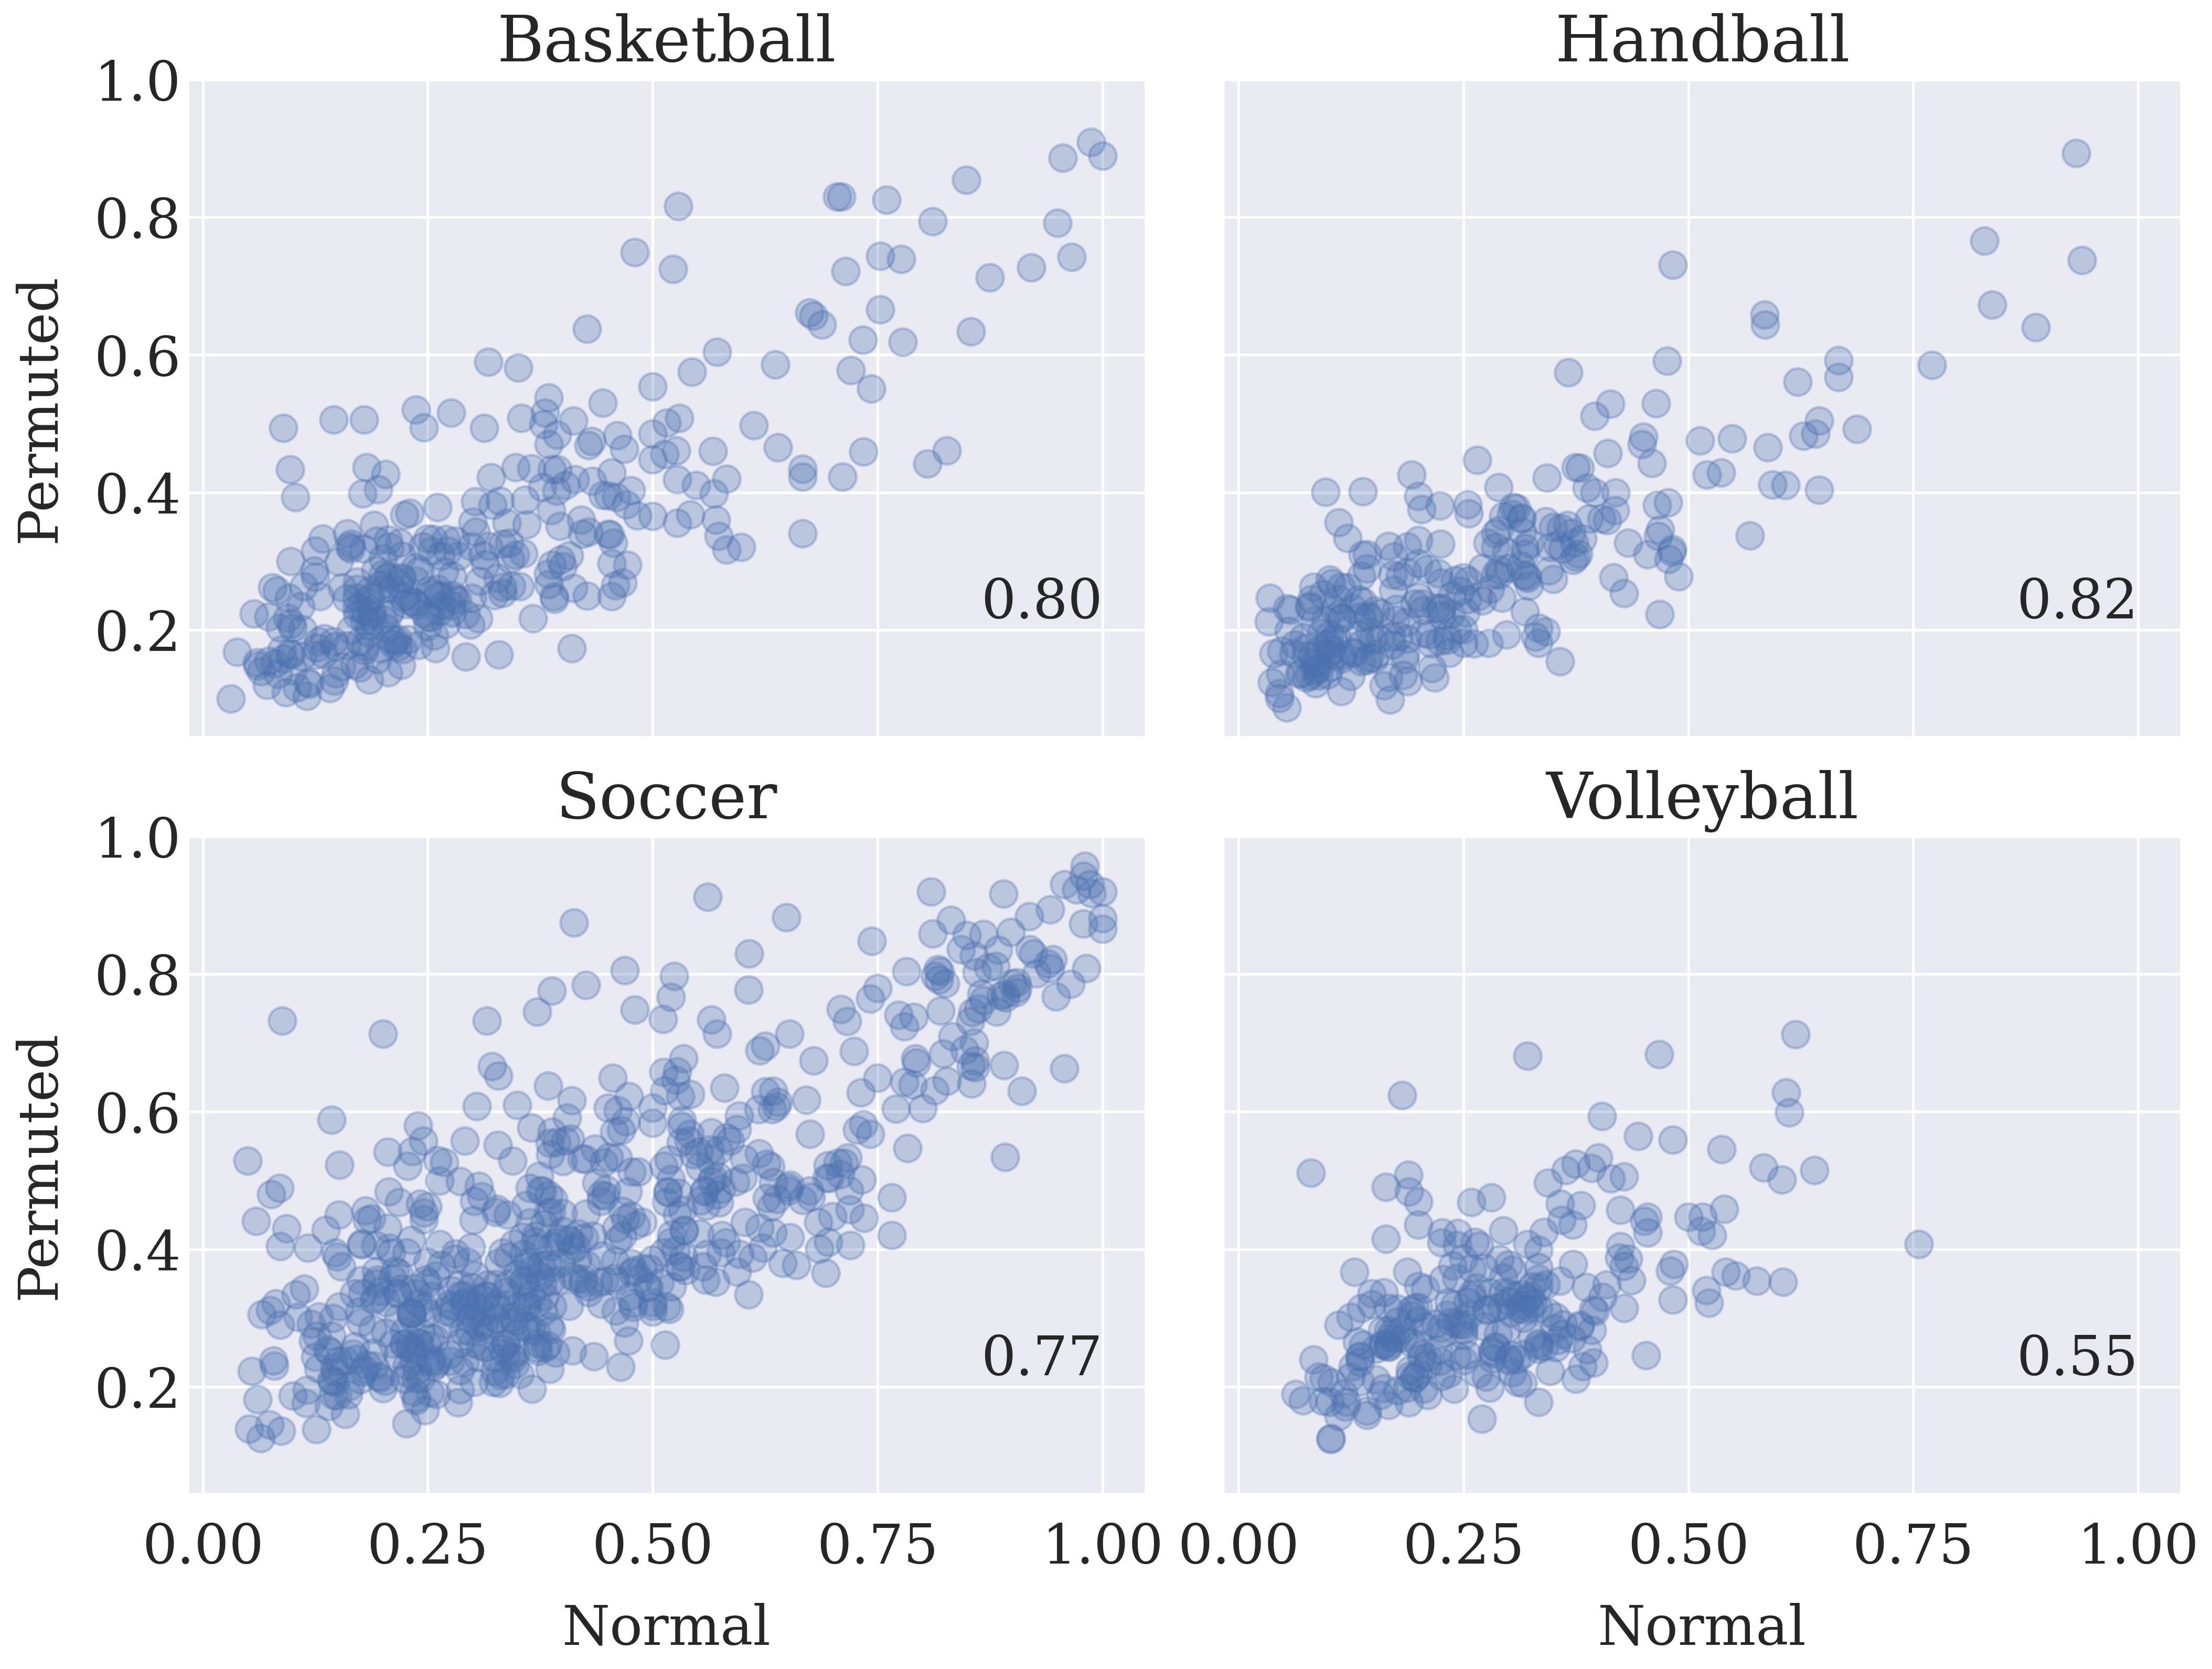

In [17]:
%matplotlib inline

plot_comparison_scatter(
    sport_to_tp_comparison, NUM_ROWS, NUM_COLS, FIGSIZE, COLUMN
)

plt.savefig(path.PLOT_PATH / "turning_point_comparison_scatter.pdf")

<h3> No Turning Points </h3>

In [18]:
pd.set_option('display.max_rows', 100)

all_sports_no_tp: list[pd.DataFrame] = []

for sport, comparison in sport_to_tp_comparison.items():
    
    with pd.option_context('mode.use_inf_as_na', True):
        index_infinity = comparison["%turning point"].isna().any(axis="columns")

    no_tp = comparison[index_infinity].copy()
    no_tp["sport"] = sport
    all_sports_no_tp.append(no_tp.reset_index())

pd.concat(all_sports_no_tp).set_index(["sport", "id"]).sort_index()

turning point   
                                                                     normal   
sport      id                                                                 
basketball extraliga@/basketball/slovakia/extraliga-2010-2...          48.0  \
           kbl@/basketball/south-korea/kbl-2020-2021/                   inf   
           liga-uruguaya@/basketball/uruguay/liga-capital-...           inf   
           lnb@/basketball/france/lnb-2012-2013/                        inf   
           nbl@/basketball/australia/nbl-2013-2014/                     inf   
           nbl@/basketball/australia/nbl-2016-2017/                     inf   
           nbl@/basketball/australia/nbl-2017-2018/                     inf   
           superleague@/basketball/georgia/superleague-201...           inf   
handball   premijer-liga@/handball/croatia/premijer-liga-2...           inf   
           premijer-liga@/handball/croatia/premijer-liga-2...          38.0   
soccer     2-bundesliga@/soccer/germany/2-bundesliga-2014-...           inf   
           2-bundesliga@/soccer/germany/2-bundesliga-2017-...           inf   
           2-bundesliga@/soccer/germany/2-bundesliga-2018-...           inf   
           2-bundesliga@/soccer/germany/2-bundesliga-2019-...           inf   
           botola-pro@/soccer/morocco/botola-pro-2015-2016/             inf   
           botola-pro@/soccer/morocco/botola-pro-2018-2019/             inf   
           canadian-premier-league@/soccer/canada/canadian...           inf   
           cymru-premier@/soccer/wales/premier-league-2015...          43.0   
           ekstraklasa@/soccer/poland/ekstraklasa-2010-2011/            inf   
           ekstraklasa@/soccer/poland/ekstraklasa-2014-2015/            inf   
           ekstraklasa@/soccer/poland/ekstraklasa-2015-2016/            inf   
           eliteserien@/soccer/norway/eliteserien-2017/                58.0   
           first-division@/soccer/albania/first-division-2...           inf   
           fortuna-liga@/soccer/slovakia/corgon-liga-2012-...           inf   
           j1-league@/soccer/japan/j1-league-2018/                      inf   
           jia-league@/soccer/china/jia-league-2012/                    inf   
           k-league-1@/soccer/south-korea/k-league-1-2021/             76.0   
           k-league-1@/soccer/south-korea/k-league-classic...           inf   
           laliga2@/soccer/spain/laliga2-2016-2017/                    69.0   
           laliga2@/soccer/spain/laliga2-2019-2020/                     inf   
           league-two@/soccer/england/league-two-2012-2013/             inf   
           league-two@/soccer/england/league-two-2013-2014/            76.0   
           lfa-first-division@/soccer/liberia/lfa-first-di...          29.0   
           lfa-first-division@/soccer/liberia/lfa-first-di...           inf   
           liga-1@/soccer/peru/primera-division-2011/                   inf   
           liga-mx@/soccer/mexico/liga-mx-2019-2020/                    inf   
           liga-profesional@/soccer/argentina/primera-divi...           inf   
           ligue-1@/soccer/algeria/ligue-1-2014-2015/                   inf   
           ligue-1@/soccer/algeria/ligue-1-2018-2019/                   inf   
           ligue-1@/soccer/algeria/ligue-1-2019-2020/                   inf   
           ligue-1@/soccer/senegal/ligue-1-2010-2011/                   inf   
           ligue-1@/soccer/senegal/ligue-1-2014-2015/                   inf   
           ligue-1@/soccer/senegal/ligue-1-2015-2016/                   inf   
           ligue-1@/soccer/senegal/ligue-1-2018-2019/                   inf   
           ligue-1@/soccer/senegal/ligue-1-2019-2020/                   inf   
           ligue-2@/soccer/algeria/ligue-2-2014-2015/                   inf   
           ligue-2@/soccer/algeria/ligue-2-2015-2016/                   inf   
           ligue-2@/soccer/algeria/ligue-2-2019-2020/                   inf   
           mls@/soccer/usa/mls-20